<a href="https://colab.research.google.com/github/Ruthiga-895/Project_2-Life-Expectancy-Analysis/blob/main/Life_Expectancy_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(2938, 22)
Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria             

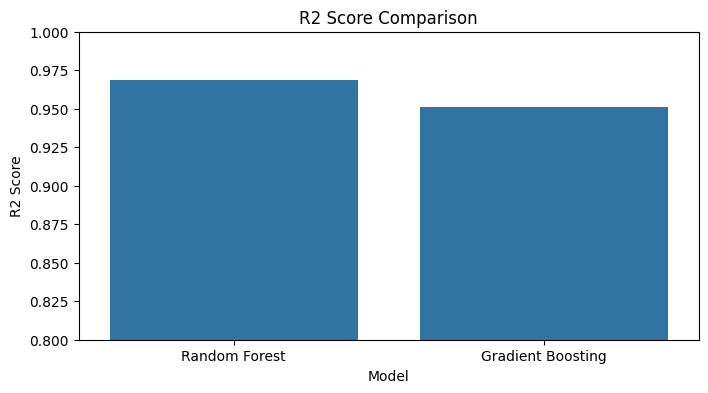

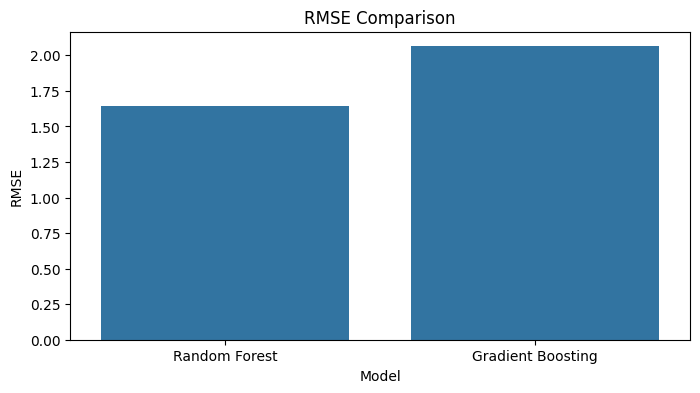

In [ ]:
# 📦 Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 📥 Load Dataset
df = pd.read_csv("/content/Life Expectancy Data.csv")  # Update path if needed

# 🔍 Quick Check
print(df.shape)
print(df.columns)
print(df.isnull().sum())

# ✅ Fix missing values — only for numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# 🔠 Encode categorical columns (like 'Status')
label_encoder = LabelEncoder()
df['Status'] = label_encoder.fit_transform(df['Status'])  # 0 = Developed, 1 = Developing

# 🧼 Drop other non-numeric columns like 'Country' for ML (optional for modeling)
df.drop(columns=['Country'], inplace=True)

# 🎯 Separate Features and Target
X = df.drop(columns='Life expectancy ')
y = df['Life expectancy ']

# 🔃 Feature Scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# ✂️ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🤖 Train Models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({'Model': name, 'R2 Score': r2, 'RMSE': rmse})

# 📊 Show Results
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print(results_df)

# 📉 Plot R2 and RMSE
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='R2 Score', data=results_df)
plt.title("R2 Score Comparison")
plt.ylim(0.8, 1)
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title("RMSE Comparison")
plt.show()
